# Phase 4 - Hypothesis Test

## Aarya Tavshikar, Jonathan Gotian, Jeanie Liu, Conor Mervyn

# Introduction

Chess is one of the most popular board games in the world. Originating from the 15th century, the game has withstood the test of time, and has grown tremendously during the modern era. A game that requires immense strategic knowledge to master, but little barriers to entry, Chess is a relatively simple game with one objective: to capture the king.

Each player receives the same assortment of pieces at the start of each game: a collection of pawns, rooks, bishops, knights, a king, and a queen. Each piece has its own abilities; pieces that have better abilities are more powerful and have more positional value. As previously mentioned, the goal of every chess game is to capture the king, but this is usually done in three stages: the opening, the midgame, and the endgame. The most quantifiable of these stages is the opening: the first series of organized moves that a player makes. These moves are part of pre established patterns, and each unique pattern has its own name. For our purposes, the larger group of patterns is referred to as the **chess openings**.

Every chess game has one limitation: time. Specifically, each player receives the same amount of time to make all their moves, and in some configurations can receive additional time for every move they make. The total amount of time they receive at the start of the game is referred to as the **base** and the additional time they may receive after each move is referred to as the **increment**. The total time limitation format is referred to as the **time constraint**.

As Chess grew in popularity, organizations have taken steps to standardize the game. One large part of this has been initiatives to standardize player ratings. Currently, the standard measure of a Chess player’s skill is their **ELO rating**. ELO ratings range from around 200 to 2800, and are based on a highly mathematical formula to determine the probability of a win between two players of similar skill levels. When two players face each other, there exists an **ELO rating differential**, which signifies the difference in their ELO ratings.

The relative strength of openings is a frequently debated topic: countless players, authors, and content creators have claimed foolproof methods of choosing the best opening. On the other hand, ELO rating differential is a seemingly mathematical concept: given a certain differential, we should expect a certain win probability. Here, we want to assess these two concepts against each other by determining if the ELO rating differential or the opening type played is a better indicator of win probability. We started by examining, cleaning, and conducting basic statistical analysis on a dataset of ~6 Million chess games played during July of 2016 on Lichess, a free online chess server.


# Data Description

### Motivation

**For what purpose was the dataset created?**

This dataset was created to analyze our research question which looks at if ELO rating differential or opening type played is a better indicator of win probability.

**Who funded the creation of the dataset?**

The funding for the original dataset is unknown at this time, but all data was published by lichess.org. Lichess is a not-profit organization that runs its free, open-source, online chess server. Players can play chess games with registered accounts or play them anonymously.

### Composition:

**What do the instances that comprise the dataset represent?**

Instances of the data represent individual games played on the lichess platform.

**How many instances are there in total?**

The data includes approximately 620,000 individual games after our extraction.

**Does the dataset contain all possible instances or is it a sample of instances from a larger set?**

The dataset does not include all possible instances, as we chose to only include 10% of the instances from the larger raw dataset extracted from Kaggle. Additionally, because the data was collected over a brief period of time using only one online platform, it is not immediately clear if it is representative of all chess games played.

We conducted statistical analyses, checking if the difference in densities for openings played and time controls was different between our dataset and the larger dataset. These analyses found no noticeable differences, ensuring that our dataset was representative of the larger set.

**What are the observations (rows) and the attributes (columns)?**

***Rows:***

Each row represents an individual chess game played

***Columns:***

* Result: The result of each game, denoted by '1-0' for White winning, '0-1' for Black winning, and '0.5-0.5' for a draw.
* WhiteElo: The ELO rating for the player using white pieces

* BlackElo: The ELO rating for the player using black pieces

* WhiteRatingDiff: The ELO rating differential from the perspective of the player using white pieces.

* ECO: The Encyclopedia Chess Opening codes which denotes the opening moves used by each player via a shorthand code.

* Opening: The full name of each opening strategy, a pattern of moves a player uses to open the game.

* Time Control: The time limit for each game in seconds (time limits broken down into the format ‘Base Time + Increment’)

* Termination: The Termination of each game (how each game was ended). The two main ones are:
    * Normal - a player was checkmated (left with no more moves)
    * Time forfeit - a player's base time reached 0 seconds before either player was able to complete the game

* Base Time is the total base time in minutes given to each player for the entire game

* Increment is the additional time (seconds) added to each player’s total time after each of their respective moves


**Is any information missing from individual instances?**
No. Data was cleaned such that each instance is complete.

**Is the dataset self-contained or does it link to or otherwise rely on external resources?**
The dataset is self-contained. Although the data was extracted from an online chess platform, our extraction of data remains static.

### Collection Process

**How was the data associated with each instance acquired?**
The data was collected from lichess where each instance corresponds to a chess game played on lichess. However, it is not directly clear where on lichess this data came from.

**Over what timeframe was the data collected?**
Per the data description on Kaggle, the data was collected over all chess games played on Lichess in July of 2016.

**Did you collect data from individuals in question directly or obtain it via third parties or other sources?**
Our data does collect information about people, as each chess player is associated with an actual person. The data was not collected from these individuals directly but was obtained from Lichess, the platform where they played chess.

**Were the individuals in question notified about the data collection, and if so, what purpose did they expect the data to be used for?**
Yes, Lichess does explicitly notify individuals of data collection for statistical purposes, as outlined in their privacy policy:

“In order to maintain statistics relating to the games that took place on the lichess.org site and in particular to allow you to know your history of the games played as well as your ranking, we will keep your username and other non-personal information, such as party metadata.
This further processing is compatible with the initial collection of your username, justified by the execution of the contract in accordance with Article 6.1.b of the GDPR as indicated in point 2 above, in accordance with recital 50 and Articles 5 and 89 of the GDPR.”
    
As indicated in the above privacy policy, individuals expected their data to be used for statistical purposes, which falls within the bounds of this project.

### Preprocessing/cleaning/labeling

**Was any preprocessing/cleaning/labeling of the data done?**
Yes, the data was taken from a relatively raw format and preprocessed to be analyzable. This involved a couple of steps. First, we shrunk down the data into 10% of its original size, in order to make our analysis more efficient. We also worked to clean some columns, removing instances where columns had unexpected or invalid values, such as termination due to cheating or abandonment. We compared our preprocessed data to the raw dataset, ensuring that our preprocessed data was not noticeably different.

**Was the “raw” data saved in addition to the preprocessed/cleaned/labeled data?**
Yes. A link to this data is below:
https://cornell.box.com/s/tey4tig1xn8ngpml1x0c866nvkz65jkj

### Uses
**Has the dataset been used for any tasks already?**
Yes. The dataset has been used to quantify high-level summary statistics and draw charts including histograms, density charts, and bar charts. These summary diagrams have given us some insight into the dataset.

**What (other) tasks could the dataset be used for?**
The dataset will be used to run more complicated statistical testing, including a hypothesis test, to better quantify our research question.


In [154]:
#import requests
#from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import time

import seaborn
from matplotlib import pyplot

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn import metrics
from sklearn.metrics import PrecisionRecallDisplay, mean_squared_error, mean_absolute_error
from scipy.stats import f_oneway, ttest_ind, ttest_1samp

import statsmodels.api as sm
import statsmodels.formula.api as smf

%load_ext sql

%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///:memory:

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [123]:
chess_games_cleaned = pd.read_csv('chess_games_cleaned.csv')
chess_games_cleaned = chess_games_cleaned.iloc[:,1:]
display(chess_games_cleaned)

,Result,WhiteElo,BlackElo,WhiteRatingDiff,ECO,Opening,TimeControl,Termination,Base (min),Increment (sec),Win_Rate
0,1-0,1901,1896,5,D10,slav defense,300+5,Time forfeit,5.0,5,0.490376
1,0-1,1641,1627,14,C20,king's pawn opening: 2.b3,300+0,Normal,5.0,0,0.412060
2,1-0,1647,1688,-41,B01,scandinavian defense: mieses-kotroc variation,180+0,Time forfeit,3.0,0,0.558550
3,0-1,1945,1900,45,B90,"sicilian defense: najdorf, lipnitsky attack",180+0,Time forfeit,3.0,0,0.444695
4,0-1,1773,1809,-36,C27,vienna game,180+0,Normal,3.0,0,0.579278
...,...,...,...,...,...,...,...,...,...,...,...
601600,0-1,1798,1753,45,B06,modern defense,60+0,Time forfeit,1.0,0,0.480550
601601,0-1,1711,1578,133,B08,pirc defense: classical variation,300+0,Normal,5.0,0,0.457798
601602,1-0,1762,1683,79,C00,st. george defense,300+4,Normal,5.0,4,0.539982
601603,1-0,2023,1742,281,A45,indian game,180+0,Normal,3.0,0,0.450352


# Pre-registered Statements

1. #### ELO rating differential will be a more influential factor than opening played in predicting win probability (βELO > βopening).

2. #### A time constraint less than 10 minutes will amplify the impact of rating differential in predicting win probability by at least 1.5 times compared to games with time constraints greater than or equal to 10 minutes. (βrating diff with constraint < 10 Minutes / βrating diff with constraint > 10 Minutes >= 1.5)



# Hypothesis Test 1
#### ELO rating differential will be a more influential factor than opening played in predicting win probability (βELO > βopening)'. 


### Opening Type Classification Strategy
In order to preform statistical tests on the list of openings to compare it to the rating differential, we needed to classify the openings into groupings. The groupings were determined based on the play type of each opening.

**The goal of an opening strategy is:**
1. **Development:** Mobilize pieces to place them on useful squares to have a strong impact on the game.
2. **Control of the center of the board:** Having control of the center allows the player to move the pieces more easily around the board and have greater control of non-center squares.
3. **King safety:** To prevent a player from losing the game, the king must remain safe. Openings tend to have the goal of removing the heightened risk of keeping the king in the center.
4. **Prevention of pawn weaknesses:** Preventing pawn weaknesses, including isolating pawns, doubling pawns, etc., allow for a stronger attack or defense.
5. **Piece coordination:** During an opening, coordinating the pieces allow for a stronger attack or defense to improve the overall position.

**The four classifications of openings that we determined were:** 
1. Open Game
2. Semi-Open Game
3. Closed Game
4. Semi-Closed Game

**Open Game:** An Open Game is where White plays where 1.e4 (creating a strong position in the center and creates an opening for the queen and the king’s bishop for easy development. In order for it to be classified as an Open Game, Black plays a symmetrical move 1.e5, allowing for the same opening advantage as White. The most popular of these openings (including their variations) are: 
* Portuguese Opening
* Center Pawn Opening
* Vienna Game
* Bishop's Opening
* Danish Gambit
* Center Game
* Alapin's Opening
* Ruy Lopez
* Ponziani Opening
* Three Knights Game
* Four Knights Game
* Italian Game
* Giuoco Piano
* Evans Gambit
* Hungarian Defense
* Two Knights Defense
* Scotch Game
* Inverted Hungarian Opening
* Konstantinopolsky Opening
* Elephant Gambit
* Philidor Defense
* Latvian Gambit
* Damiano Defense
* Petrov's Defense
* Greco Defense
* Napoleon Opening
* King's Gambit
* King’s Pawn Opening
* Danvers Opening
* Bongcloud Attack


**Semi-Open Game:** A Semi-Open Game is where White plays where 1.e4 (creating a strong position in the center and creates an opening for the queen and the king’s bishop for easy development. However, if Black plays any other move except 1.e5 as its first move, breaking the symmetry of the fully open position, it is classified as a Semi-Open Game. The most popular of these openings (including their variations) are: 

* Corn Stalk Defense
* St. George Defense
* Lemming Defense
* Owen's Defense
* Sicilian Defense
* Caro-Kann Defense
* Nimzowitch Defense
* Scandinavian Defense
* Balogh Defense
* Czech Defense
* Pirc Defense
* French Defense
* Fred Defense
* Barnes Defense
* Alehkine's Defense
* Borg Opening
* Modern Defense
* Goldsmith Defense
* Carr Defense
* Adams Defense


**Closed Game:** A Closed Game is where White plays where 1.d4 (creating a strong position in the center and creates an opening for the queen and the queen’s bishop for easy development while protecting the center pawn from attack because of the Queen's guard of it. In order for it to be classified as an Closed Game, Black plays a symmetrical move 1.d5, allowing for the same opening advantage as White. The most popular of these openings (including their variations) are:
* Queen’s Pawn Opening
* Closed Game
* Queen’s Gambit
* Queen’s Gambit Accepted
* Queen’s Gambit Declined
* Slav Defense
* Stonewall Attack
* Colle System
* Richter-Veresov Attack
* Torre Attack
* Symmetrical Defense
* Chigorin Defense
* Albin Countergambit
* Baltic Defense
* Marshall Defense
* Blackmar-Diemer Gambit
* Colle System
* London System

**Semi-Closed Game:** A Closed Game is where White plays where 1.d4 (creating a strong position in the center and creates an opening for the queen and the queen’s bishop for easy development while protecting the center pawn from attack because of the Queen's guard of it. However, if Black plays any other move except 1.d5 as its first move, breaking the symmetry of the closed position, it is classified as a Semi-Closed Game. The most popular of these openings (including their variations) are: The most popular of these openings (including their variations) are:
* Polish Defense
* Benoni Defense
* Queen's Knight Defense
* Wade Defense
* Englund Gambit
* English Defense
* Keres Defense
* Dutch Defense
* Indian Game
* Nimzo-Indian Defense
* Queen's Indian Defense
* Bogo–Indian Defense
* Blumenfeld Countergambit
* Catalan Opening
* Grunfeld Defense
* King’s Indian Defense
* Benoni Defense
* Benko Gambit
* Volga Gambit
* Old Indian Defense
* Budapest Gambit
* Modern Benoni

These are the most popular openings found at each classification. Each opening's classification type is denoted under the new column "OpeningType" for each chess game instance. All other openings that do not fit these classifications were dropped for a better analysis. 

In [124]:
#CLASSIFICATION FOR EACH OPENING --> Open Game, Semi-Open game, Semi-Closed game, Closed gam

#Created a column OpenGame - True if open game type, False otherwise
chess_games_cleaned["OpenGame"] = chess_games_cleaned["Opening"].str.contains("portuguese opening") | \
chess_games_cleaned["Opening"].str.contains("center pawn opening") | \
chess_games_cleaned["Opening"].str.contains("vienna game") | \
chess_games_cleaned["Opening"].str.contains("bishop's opening") | \
chess_games_cleaned["Opening"].str.contains("danish gambit") | \
chess_games_cleaned["Opening"].str.contains("center game") | \
chess_games_cleaned["Opening"].str.contains("alapin's opening") | \
chess_games_cleaned["Opening"].str.contains("ruy lopez") | \
chess_games_cleaned["Opening"].str.contains("ponziani opening") | \
chess_games_cleaned["Opening"].str.contains("three knights game") | \
chess_games_cleaned["Opening"].str.contains("four knights game") | \
chess_games_cleaned["Opening"].str.contains("italian game") | \
chess_games_cleaned["Opening"].str.contains("giuoco piano") | \
chess_games_cleaned["Opening"].str.contains("evans gambit") | \
chess_games_cleaned["Opening"].str.contains("hungarian defense") | \
chess_games_cleaned["Opening"].str.contains("two knights defense") | \
chess_games_cleaned["Opening"].str.contains("scotch game") | \
chess_games_cleaned["Opening"].str.contains("inverted hungarian opening") | \
chess_games_cleaned["Opening"].str.contains("konstantinopolsky opening") | \
chess_games_cleaned["Opening"].str.contains("elephant gambit") | \
chess_games_cleaned["Opening"].str.contains("philidor defense") | \
chess_games_cleaned["Opening"].str.contains("latvian gambit") | \
chess_games_cleaned["Opening"].str.contains("damiano defense") | \
chess_games_cleaned["Opening"].str.contains("petrov's defense") | \
chess_games_cleaned["Opening"].str.contains("greco defense") | \
chess_games_cleaned["Opening"].str.contains("napoleon opening") | \
chess_games_cleaned["Opening"].str.contains("king's gambit") | \
chess_games_cleaned["Opening"].str.contains("king's pawn opening") | \
chess_games_cleaned["Opening"].str.contains("danvers opening") | \
chess_games_cleaned["Opening"].str.contains("bongcloud attack")

#Created a column SemiOpenGame - True if semi-open game type, False otherwise
chess_games_cleaned["SemiOpenGame"] = chess_games_cleaned["Opening"].str.contains("corn stalk defense") | \
chess_games_cleaned["Opening"].str.contains("st. george defense") | \
chess_games_cleaned["Opening"].str.contains("lemming defense") | \
chess_games_cleaned["Opening"].str.contains("owen's defense") | \
chess_games_cleaned["Opening"].str.contains("sicilian defense") | \
chess_games_cleaned["Opening"].str.contains("caro-kann defense") | \
chess_games_cleaned["Opening"].str.contains("nimzowitch defense") | \
chess_games_cleaned["Opening"].str.contains("scandinavian defense") | \
chess_games_cleaned["Opening"].str.contains("balogh defense") | \
chess_games_cleaned["Opening"].str.contains("pirc defense") | \
chess_games_cleaned["Opening"].str.contains("french defense") | \
chess_games_cleaned["Opening"].str.contains("fred defense") | \
chess_games_cleaned["Opening"].str.contains("barnes defense") | \
chess_games_cleaned["Opening"].str.contains("alehkine's defense") | \
chess_games_cleaned["Opening"].str.contains("borg opening") | \
chess_games_cleaned["Opening"].str.contains("modern defense") | \
chess_games_cleaned["Opening"].str.contains("goldsmith defense") | \
chess_games_cleaned["Opening"].str.contains("carr defense") | \
chess_games_cleaned["Opening"].str.contains("adams defense")

#Created a column SemiClosedGame - True if semi-closed game type, False otherwise
chess_games_cleaned["SemiClosedGame"] = chess_games_cleaned["Opening"].str.contains("polish defense") | \
chess_games_cleaned["Opening"].str.contains("benoni defense") | \
chess_games_cleaned["Opening"].str.contains("queen's knight defense") | \
chess_games_cleaned["Opening"].str.contains("wade defense") | \
chess_games_cleaned["Opening"].str.contains("englund gambit") | \
chess_games_cleaned["Opening"].str.contains("english defense") | \
chess_games_cleaned["Opening"].str.contains("keres defense") | \
chess_games_cleaned["Opening"].str.contains("dutch defense") | \
chess_games_cleaned["Opening"].str.contains("indian game") | \
chess_games_cleaned["Opening"].str.contains("nimzo-indian defense") | \
chess_games_cleaned["Opening"].str.contains("queen's indian defense") | \
chess_games_cleaned["Opening"].str.contains("bogo–indian defense") | \
chess_games_cleaned["Opening"].str.contains("blumenfeld countergambit") | \
chess_games_cleaned["Opening"].str.contains("catalan opening") | \
chess_games_cleaned["Opening"].str.contains("king's indian defense") | \
chess_games_cleaned["Opening"].str.contains("benoni defense") | \
chess_games_cleaned["Opening"].str.contains("benko gambit") | \
chess_games_cleaned["Opening"].str.contains("old indian defense") | \
chess_games_cleaned["Opening"].str.contains("budapest gambit") | \
chess_games_cleaned["Opening"].str.contains("modern benoni")

#Created a column ClosedGame - True if closed game type, False otherwise
    # NOTE: "Queens Gambit" includes both Queen's gambit accepted and Queen's gambit declined
chess_games_cleaned["ClosedGame"] = chess_games_cleaned["Opening"].str.contains("queen's pawn") | \
chess_games_cleaned["Opening"].str.contains("closed game") | \
chess_games_cleaned["Opening"].str.contains("queen's gambit") | \
chess_games_cleaned["Opening"].str.contains("slav defense") | \
chess_games_cleaned["Opening"].str.contains("stonewall attack") | \
chess_games_cleaned["Opening"].str.contains("colle system") | \
chess_games_cleaned["Opening"].str.contains("richter-veresov attack") | \
chess_games_cleaned["Opening"].str.contains("torre attack") | \
chess_games_cleaned["Opening"].str.contains("symmetrical defense") | \
chess_games_cleaned["Opening"].str.contains("chigorin defense") | \
chess_games_cleaned["Opening"].str.contains("baltic defense") | \
chess_games_cleaned["Opening"].str.contains("marshall defense") | \
chess_games_cleaned["Opening"].str.contains("blackmar-diemer gambit") | \
chess_games_cleaned["Opening"].str.contains("colle system") | \
chess_games_cleaned["Opening"].str.contains("london system")

#Denoting each game's opening type played under column "OpeningType"
chess_games_cleaned.loc[(chess_games_cleaned['OpenGame'] == True), 'OpeningType'] = 'Open Game'
chess_games_cleaned.loc[(chess_games_cleaned['SemiOpenGame'] == True), 'OpeningType'] = 'Semi Open Game'
chess_games_cleaned.loc[(chess_games_cleaned['ClosedGame'] == True), 'OpeningType'] = 'Closed Game'
chess_games_cleaned.loc[(chess_games_cleaned['SemiClosedGame'] == True), 'OpeningType'] = 'Semi Closed Game'

#Creating a numeric column for the 4 Opening Types
#chess_games_cleaned.loc[(chess_games_cleaned['OpenGame'] == True), 'OpeningType_Num'] = '1'
#chess_games_cleaned.loc[(chess_games_cleaned['SemiOpenGame'] == True), 'OpeningType_Num'] = '2'
#chess_games_cleaned.loc[(chess_games_cleaned['ClosedGame'] == True), 'OpeningType_Num'] = '3'
#chess_games_cleaned.loc[(chess_games_cleaned['SemiClosedGame'] == True), 'OpeningType_Num'] = '4'

#Dropping additional columns created
chess_games_cleaned = chess_games_cleaned.drop(['OpenGame', 'SemiOpenGame', 'SemiClosedGame', 'ClosedGame'], axis = 1)

#Dropping NaNs in the OpeningType column, indicating openings that were not classified
chess_games_cleaned = chess_games_cleaned.dropna(subset = ['OpeningType'])

#print(chess_games_cleaned['OpeningType'].unique())

display(chess_games_cleaned.head(50))

,Result,WhiteElo,BlackElo,WhiteRatingDiff,ECO,Opening,TimeControl,Termination,Base (min),Increment (sec),Win_Rate,OpeningType
0,1-0,1901,1896,5,D10,slav defense,300+5,Time forfeit,5.0,5,0.490376,Closed Game
1,0-1,1641,1627,14,C20,king's pawn opening: 2.b3,300+0,Normal,5.0,0,0.412060,Open Game
2,1-0,1647,1688,-41,B01,scandinavian defense: mieses-kotroc variation,180+0,Time forfeit,3.0,0,0.558550,Semi Open Game
3,0-1,1945,1900,45,B90,"sicilian defense: najdorf, lipnitsky attack",180+0,Time forfeit,3.0,0,0.444695,Semi Open Game
4,0-1,1773,1809,-36,C27,vienna game,180+0,Normal,3.0,0,0.579278,Open Game
5,0-1,1895,1886,9,B10,caro-kann defense: two knights attack,180+0,Time forfeit,3.0,0,0.521220,Semi Open Game
6,1-0,2155,2356,-201,D02,queen's pawn game: london system,180+0,Normal,3.0,0,0.499276,Closed Game
7,0-1,2010,2111,-101,A45,indian game,300+0,Normal,5.0,0,0.450352,Semi Closed Game
8,1-0,1764,1773,-9,B01,scandinavian defense: mieses-kotroc variation,180+0,Time forfeit,3.0,0,0.558550,Semi Open Game
9,0-1,1649,1638,11,C57,"italian game: two knights defense, traxler cou...",900+3,Normal,15.0,3,0.408377,Open Game


### Create Binary Variable for Game Result
The "Result" column denotes the string "1-0" for White winning, "0-1" for Black winning, and "1/2-1/2" for draws. 

To predict the odds of a winning chess game with either ELO rating differential or opening type played, creating a separate binary variable for game results is necessary to run logistic regressions.

All instances of '1-0' in the "Result" column is encoded as 1 in the binary variable, while '0-1' is encoded as 0. Draws are ignored and dropped as the binary variable only takes 2 outcomes (win or loss). 

In [125]:
#Changing Results to Binary
chess_games_cleaned.loc[(chess_games_cleaned['Result'] == '1-0'), 'Result_Binary'] = 1
chess_games_cleaned.loc[(chess_games_cleaned['Result'] == '0-1'), 'Result_Binary'] = 0

#Drop NaNs in the Result_Binary column, which are draws; converted binary variable to ints
chess_games_cleaned = chess_games_cleaned.dropna(subset = ['Result_Binary'])
chess_games_cleaned['Result_Binary'] = chess_games_cleaned['Result_Binary'].astype(int)

#print(chess_games_cleaned['Result_Binary'].unique())

display(chess_games_cleaned.head(50))

,Result,WhiteElo,BlackElo,WhiteRatingDiff,ECO,Opening,TimeControl,Termination,Base (min),Increment (sec),Win_Rate,OpeningType,Result_Binary
0,1-0,1901,1896,5,D10,slav defense,300+5,Time forfeit,5.0,5,0.490376,Closed Game,1
1,0-1,1641,1627,14,C20,king's pawn opening: 2.b3,300+0,Normal,5.0,0,0.412060,Open Game,0
2,1-0,1647,1688,-41,B01,scandinavian defense: mieses-kotroc variation,180+0,Time forfeit,3.0,0,0.558550,Semi Open Game,1
3,0-1,1945,1900,45,B90,"sicilian defense: najdorf, lipnitsky attack",180+0,Time forfeit,3.0,0,0.444695,Semi Open Game,0
4,0-1,1773,1809,-36,C27,vienna game,180+0,Normal,3.0,0,0.579278,Open Game,0
5,0-1,1895,1886,9,B10,caro-kann defense: two knights attack,180+0,Time forfeit,3.0,0,0.521220,Semi Open Game,0
6,1-0,2155,2356,-201,D02,queen's pawn game: london system,180+0,Normal,3.0,0,0.499276,Closed Game,1
7,0-1,2010,2111,-101,A45,indian game,300+0,Normal,5.0,0,0.450352,Semi Closed Game,0
8,1-0,1764,1773,-9,B01,scandinavian defense: mieses-kotroc variation,180+0,Time forfeit,3.0,0,0.558550,Semi Open Game,1
9,0-1,1649,1638,11,C57,"italian game: two knights defense, traxler cou...",900+3,Normal,15.0,3,0.408377,Open Game,0


### Create Dummy Variables for OpeningType
To use opening type as an input variable in logistic regressions, we must create dummy variables since opening type is a categorical data. As we have 4 distinct opening types, we dropped the 'Open Game' column so that we only have 3 dummy variables. 

In [126]:
#Creating dummy variables for each of the opening type then dropping the 'Open Game' type
openingtype_dummies = pd.get_dummies(data = chess_games_cleaned['OpeningType'])
chess_games_cleaned = pd.concat([chess_games_cleaned, openingtype_dummies], axis = 1)
chess_games_cleaned = chess_games_cleaned.drop(['Open Game'], axis = 1)

display(chess_games_cleaned.head())

,Result,WhiteElo,BlackElo,WhiteRatingDiff,ECO,Opening,TimeControl,Termination,Base (min),Increment (sec),Win_Rate,OpeningType,Result_Binary,Closed Game,Semi Closed Game,Semi Open Game
0,1-0,1901,1896,5,D10,slav defense,300+5,Time forfeit,5.0,5,0.490376,Closed Game,1,1,0,0
1,0-1,1641,1627,14,C20,king's pawn opening: 2.b3,300+0,Normal,5.0,0,0.412060,Open Game,0,0,0,0
2,1-0,1647,1688,-41,B01,scandinavian defense: mieses-kotroc variation,180+0,Time forfeit,3.0,0,0.558550,Semi Open Game,1,0,0,1
3,0-1,1945,1900,45,B90,"sicilian defense: najdorf, lipnitsky attack",180+0,Time forfeit,3.0,0,0.444695,Semi Open Game,0,0,0,1
4,0-1,1773,1809,-36,C27,vienna game,180+0,Normal,3.0,0,0.579278,Open Game,0,0,0,0


## Hypothesis Test 1: Significance of Coefficient for ELO Rating Differential in Predicting Chess Game Win Outcome

Null Hypothesis: ELO Rating Differential is not a significant predictor of Chess Game Win Outcome

Alternative Hypothesis: ELO Rating Differential is a significant predictor of Chess Game Win Outcome

In [163]:
ratingdiff_logistic_model = smf.logit('Result_Binary ~ WhiteRatingDiff', data = chess_games_cleaned).fit()
display(ratingdiff_logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.612553
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Result_Binary   No. Observations:               417391
Model:                          Logit   Df Residuals:                   417389
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                  0.1155
Time:                        21:23:04   Log-Likelihood:            -2.5567e+05
converged:                       True   LL-Null:                   -2.8907e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0726      0.003     21.646      0.000       0.066       0.079
WhiteRatingDiff     0.0048   2.16e-05    221.345      0.000       0.005       0.005
===================================================================================
"""

Looking at the Logit Regression Results, the p-value for ELO Rating Differential (WhiteRatingDiff) is 0. This means that the chance of getting a z value that is more extreme than 221.345 is 0, so it is unlikely that the result is due to randomness or chance. Multiple iterations were also performed to minimize randomness and increase the accuracy of the coefficient. To conlude, we can reject the null hypothesis at the 1% significance level. ELO Rating Differential is a significant predictor of chess game win outcome.

## Hypothesis Test 2: Test the Significance of Each Coefficient for Opening Type Played in Predicting Chess Game Win Outcome

Null Hypothesis: Each Opening Type Played is not a significant predictor of Chess Game Win Outcome

Alternative Hypothesis: Each Opening Type Played is a significant predictor of Chess Game Win Outcome

In [164]:
openingtype_logistic_model = smf.logit('Result_Binary ~ C(OpeningType)', data = chess_games_cleaned).fit()
display(openingtype_logistic_model.summary())

Optimization terminated successfully.
         Current function value: 0.691275
         Iterations 3


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Result_Binary   No. Observations:               417391
Model:                          Logit   Df Residuals:                   417387
Method:                           MLE   Df Model:                            3
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                0.001852
Time:                        22:17:34   Log-Likelihood:            -2.8853e+05
converged:                       True   LL-Null:                   -2.8907e+05
Covariance Type:            nonrobust   LLR p-value:                8.186e-232
======================================================================================================
                                         coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Intercept                              0.1685      0.007     24.300      0.000       0.155       0.182
C(OpeningType)[T.Open Game]            0.0197      0.009      2.114      0.035       0.001       0.038
C(OpeningType)[T.Semi Closed Game]    -0.1406      0.012    -11.918      0.000      -0.164      -0.117
C(OpeningType)[T.Semi Open Game]      -0.2011      0.008    -24.110      0.000      -0.217      -0.185
======================================================================================================
"""

Looking at the Logistic Regression Results, the p-values for coefficients of Open Game, Semi Closed Game, and Semi Open Game are 0.035, 0.000, and 0.000, respectively. Again, due to their small p-values (less than 5% significance level), it is unlikely that the result is due to randomness. Built in into statsmodels, multiple iterations were also performed to minimize randomness and increase the accuracy of the coefficient. We can reject the null hypotheses at a 5% significance level that the coefficient for Open Game, Semi Closed Game, and Semi Open Game are not significant. More specifically, we are extremely confident that Semi Closed Game and Semi Open Game are significant predictors of chess game win outcome due to their p-values of 0. Although Open Game's coefficient has a slightly higher p-value of 0.035, it is still less than 5%. We are thus fairly confident that open game is a significant predictor as well.

### Train Test Split

In [131]:
#creating a train/test split
chess_train, chess_test = train_test_split(chess_games_cleaned, test_size = 0.3, random_state = 2950)

#define a function for running logistic regressions
def run_logistic_regression_sm (input_var, train, test, predicted_var):
    #creating input and output arrays for train and test set
    train_x = sm.add_constant(train[input_var])
    print(type(train_x))
    train_y = train[[predicted_var]]
    print(type(train_y))
    test_x = sm.add_constant(test[input_var])
    test_y = test[predicted_var]
    
    #training the model with input and output arrays for train set
    model = sm.Logit(train_y, train_x.to_numpy()).fit()
    #model = smf.logit(str(predicted_var)+' ~ ' + str(input_var), data = train).fit()
    display(model.summary())
    
    #making predictions of the ouput for train and test set
    train_prediction = model.predict(train_x)
    train_prediction = train_prediction.round(decimals = 0).astype(int)
    test_prediction = model.predict(test_x)
    test_prediction = test_prediction.round(decimals = 0).astype(int)
    
    #calculated accuracy, precision, recall, and f1 scores for train and test sets
    train_accuracy = metrics.accuracy_score(train_y, train_prediction)
    test_accuracy = metrics.accuracy_score(test_y, test_prediction)
    
    train_precision = metrics.precision_score(train_y, train_prediction)
    test_precision = metrics.precision_score(test_y, test_prediction)
    
    train_recall = metrics.recall_score(train_y, train_prediction)
    test_recall = metrics.recall_score(test_y, test_prediction)
    
    train_f1 = metrics.f1_score(train_y, train_prediction)
    test_f1 = metrics.f1_score(test_y, test_prediction)
    
    train_mse = mean_squared_error(train_y, train_prediction)
    test_mse = mean_squared_error(test_y, test_prediction)
    
    #printed all required elements with appropriate rounding
    print('Input Variable(s): ' + str(input_var))
    print('Train Accuracy: ' + str(np.round(train_accuracy,3)))
    print('Test Accuracy: ' + str(np.round(test_accuracy,3)))
    print('Train Precision: ' + str(np.round(train_precision,3)))
    print('Test Precision: ' + str(np.round(test_precision, 3)))
    print('Train Recall: ' + str(np.round(train_recall, 3)))
    print('Test Recall: ' + str(np.round(test_recall, 3)))
    print('Train F1: ' + str(np.round(train_f1, 3)))
    print('Test F1: ' + str(np.round(test_f1,3)))
    print('Train Mean Squared Error: ' + str(np.round(train_mse, 3)))
    print('Test Mean Squared Error: ' + str(np.round(test_mse, 3)))

### Running Logistic Regression with WhiteRatingDiff as Input Variable

In [132]:
run_logistic_regression_sm('WhiteRatingDiff', chess_train, chess_test, 'Result_Binary')

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Optimization terminated successfully.
         Current function value: 0.612491
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Result_Binary   No. Observations:               292173
Model:                          Logit   Df Residuals:                   292171
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                  0.1156
Time:                        17:29:50   Log-Likelihood:            -1.7895e+05
converged:                       True   LL-Null:                   -2.0235e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0723      0.004     18.029      0.000       0.064       0.080
x1             0.0048   2.59e-05    185.241      0.000       0.005       0.005
==============================================================================
"""

Input Variable(s): WhiteRatingDiff
Train Accuracy: 0.654
Test Accuracy: 0.653
Train Precision: 0.656
Test Precision: 0.655
Train Recall: 0.696
Test Recall: 0.695
Train F1: 0.675
Test F1: 0.674
Train Mean Squared Error: 0.346
Test Mean Squared Error: 0.347


### Running Logistic Regression with OpeningType Dummies as Input Variables

In [133]:
run_logistic_regression_sm(['Closed Game', 'Semi Closed Game', 'Semi Open Game'], chess_train, chess_test, 'Result_Binary')

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Optimization terminated successfully.
         Current function value: 0.691269
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Result_Binary   No. Observations:               292173
Model:                          Logit   Df Residuals:                   292169
Method:                           MLE   Df Model:                            3
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                0.001884
Time:                        17:29:50   Log-Likelihood:            -2.0197e+05
converged:                       True   LL-Null:                   -2.0235e+05
Covariance Type:            nonrobust   LLR p-value:                6.413e-165
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1864      0.007     25.001      0.000       0.172       0.201
x1            -0.0183      0.011     -1.645      0.100      -0.040       0.004
x2            -0.1455      0.014    -10.690      0.000      -0.172      -0.119
x3            -0.2233      0.009    -24.028      0.000      -0.241      -0.205
==============================================================================
"""

Input Variable(s): ['Closed Game', 'Semi Closed Game', 'Semi Open Game']
Train Accuracy: 0.525
Test Accuracy: 0.523
Train Precision: 0.538
Test Precision: 0.537
Train Recall: 0.578
Test Recall: 0.572
Train F1: 0.557
Test F1: 0.554
Train Mean Squared Error: 0.475
Test Mean Squared Error: 0.477


### Significance Testing: Hypothesis 1

In [134]:
#running a logistic regression on the opening type played in predicting win outcome (win or loss)
#run_logistic_regression(['WhiteRatingDiff','Closed Game', 'Semi Closed Game', 'Semi Open Game'], chess_train, chess_test, 'Result_Binary')

In [135]:
def run_OLS (input_var, train, test, predicted_var):
    #creating input and output arrays for train and test set
    train_x = train[input_var]
    train_y = train[predicted_var]
    test_y = test[predicted_var]
    
    #training the model with input and output arrays for train set
    model =  sm.OLS(train_y, train_x).fit()
    print(model.summary())

In [136]:
run_OLS(['WhiteRatingDiff','Closed Game', 'Semi Closed Game', 'Semi Open Game'], chess_train, chess_test, 'Result_Binary')

                                 OLS Regression Results                                
Dep. Variable:          Result_Binary   R-squared (uncentered):                   0.452
Model:                            OLS   Adj. R-squared (uncentered):              0.452
Method:                 Least Squares   F-statistic:                          6.035e+04
Date:                Thu, 08 Dec 2022   Prob (F-statistic):                        0.00
Time:                        17:29:51   Log-Likelihood:                     -2.3020e+05
No. Observations:              292173   AIC:                                  4.604e+05
Df Residuals:                  292169   BIC:                                  4.605e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [138]:
#null: They are all the same
# alternative: They are all different. 

open_arr = np.array(chess_games_cleaned.loc[chess_games_cleaned["OpeningType"] == "Open Game"]["Win_Rate"])
semiopen_arr = np.array(chess_games_cleaned.loc[chess_games_cleaned["OpeningType"] == "Semi Open Game"]["Win_Rate"])
closed_arr = np.array(chess_games_cleaned.loc[chess_games_cleaned["OpeningType"] == "Closed Game"]["Win_Rate"])
semiclosed_arr = np.array(chess_games_cleaned.loc[chess_games_cleaned["OpeningType"] == "Semi Closed Game"]["Win_Rate"])

stat, p1 = ttest_ind(open_arr, semiopen_arr)
stat, p2 = ttest_ind(open_arr, closed_arr)
stat, p3 = ttest_ind(open_arr, semiclosed_arr)
print(p1, p2, p3)

stat, p4 = ttest_ind(semiopen_arr, closed_arr)
stat, p5 = ttest_ind(semiopen_arr, semiclosed_arr)
print(p4,p5)

stat, p6 = ttest_ind(semiclosed_arr, closed_arr)
print(p6)

#%sql SELECT Win_Rate FROM chess_games_cleaned WHERE OpeningType =  LIMIT 10

0.0 4.875634328630398e-152 0.0
0.0 0.0
0.0


Because all the p-values are 0, we can reject the null hypothesis and claim that the win rates are statistically different between opening type played 


In [139]:
#null: The opening type specific win rate is statistically different than the overall win rate
# alternative: The opening type specific win rate is not statistically different than the overall win rate

opening_win_rate = [0.486861, 0.520572, 0.473402, 0.527382]
pop_win_rate = 0.497683

stat, p_win_rate = ttest_1samp(opening_win_rate, pop_win_rate)

print(stat, p_win_rate)

0.33557322656008476 0.7592900655527423


p value is very high, so we fail to reject the null hypothesis, 

### Interpretation: Hypothesis 1
In order to predict which model is a better determinant of win probability (rating differential or opening type), we need to look at the accuracy rating of each model. Comparing the accuracy of the rating differential model (65.1%), it exceeds the accuracy of the game type model (52.4%). Furthermore, in looking at the other 3 metrics, precision, recall, and f1, which indicates the effectiveness of the model, the metrics are all higher for the rating differential model (65.3%, 69.2%, 67.2% respectively) compared to the game type model (53.6%, 57.6%, 55.5%, respectively).

# Hypothesis Test 2
   
#### Null Hypothesis: ELO rating differential is a less signifcant predictor of win outcomes in games with time constraints (base) of less than 10 minutes compared to games with time constraints (base) of more than or equal to 10 minutes.

#### Alternative Hypothesis: ELO rating differential is a more signifcant predictor of win outcomes in games with time constraints (base) of less than 10 minutes compared to games with time constraints (base) of more than or equal to 10 minutes. 
   
   Base of a chess game is the total amount of time a player receives at the start of the game. It is the total time that a player has to make moves in the entirety of the game. Since games with a smaller base give user less time to think, we hypothesize that ELO rating differential is a more significant predictor of win outcome in games with shorter base.
<!-- 
* Single var regression for elo difference vs win prob, data =  constraint < 10 minutes
* Single var regression for elo difference vs win prob, data = constraint > 10 minutes
* Compare coefficients
 -->

### How we decided to split the data into two groups: games with base < 10 & games with base >= 10
We first renamed the column "Base (min)" to "Base" to more easily select the column in SQL.

We then used SQL to see the frequency of games that are played at a different time base in minutes. We found that the most commonly played games are 5-min, 3-min, 1-min, 10-min, and 2-min games. As there are more games with base of < 10 min than > 10, we grouped the games played at a 10-min base with the > 10 min group to ensure comparable sample sizes.

In [140]:
#making the base column filterable in sql
chess_games_cleaned = chess_games_cleaned.rename(columns = {"Base (min)": "Base"})

#checking
%sql SELECT Base, COUNT(Base) FROM chess_games_cleaned GROUP BY Base ORDER BY Count(Base) DESC

,Base,"count(""Base"")"
0,5.00,106057
1,3.00,83868
2,1.00,67515
3,10.00,49963
4,2.00,22422
5,15.00,16695
6,0.50,13664
7,8.00,9369
8,7.00,8730
9,4.00,8341


Here, we filtered the dataset for games with base <10 and games with base >=10, then created train and test sets for each group.

In [141]:
#filter for over/under 10 min
%sql constraint_under_10 << SELECT * FROM chess_games_cleaned WHERE Base < 10
%sql constraint_over_equal_10 << SELECT * FROM chess_games_cleaned WHERE Base >= 10

#creating train and test sets for games with base <10 and >= 10
under_ten_train, under_ten_test = train_test_split(constraint_under_10, test_size = 0.30, random_state = 2950) 
over_equal_ten_train, over_equal_ten_test = train_test_split(constraint_over_10, test_size = 0.30, random_state = 2950)

Returning data to local variable constraint_under_10
Returning data to local variable constraint_over_equal_10


### Running Logistic Regression on games with base of less than 10 minutes.
The input is Elo rating differential while the output is win outcome (binary). 

In [142]:
run_logistic_regression_sm ('WhiteRatingDiff', under_ten_train, under_ten_test, 'Result_Binary')

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Optimization terminated successfully.
         Current function value: 0.612081
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Result_Binary   No. Observations:               235177
Model:                          Logit   Df Residuals:                   235175
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                  0.1164
Time:                        17:29:56   Log-Likelihood:            -1.4395e+05
converged:                       True   LL-Null:                   -1.6291e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0669      0.004     14.960      0.000       0.058       0.076
x1             0.0048   2.88e-05    166.818      0.000       0.005       0.005
==============================================================================
"""

Input Variable(s): WhiteRatingDiff
Train Accuracy: 0.654
Test Accuracy: 0.655
Train Precision: 0.656
Test Precision: 0.66
Train Recall: 0.689
Test Recall: 0.691
Train F1: 0.672
Test F1: 0.675
Train Mean Squared Error: 0.346
Test Mean Squared Error: 0.345


Comparing the train and test metrics, the train accuracy, precision, recall, and F1 are almost identical to the test set's metrics, indicating that the regression model is not overfitting on the train set. Since the p-value for the Elo Rating Differential coefficient is 0, we can conclude that the coefficient is a significant predictor of win outcome.

### Running Logistic Regression on games with base of more than or equal to 10 minutes.
The input is Elo rating differential while the output is win outcome (binary). 

In [143]:
run_logistic_regression_sm ('WhiteRatingDiff', over_equal_ten_train, over_equal_ten_test, 'Result_Binary')

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Optimization terminated successfully.
         Current function value: 0.617736
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          Result_Binary   No. Observations:                56996
Model:                          Logit   Df Residuals:                    56994
Method:                           MLE   Df Model:                            1
Date:                Thu, 08 Dec 2022   Pseudo R-squ.:                  0.1072
Time:                        17:29:57   Log-Likelihood:                -35208.
converged:                       True   LL-Null:                       -39435.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0953      0.009     10.563      0.000       0.078       0.113
x1             0.0046   5.85e-05     79.342      0.000       0.005       0.005
==============================================================================
"""

Input Variable(s): WhiteRatingDiff
Train Accuracy: 0.649
Test Accuracy: 0.65
Train Precision: 0.652
Test Precision: 0.649
Train Recall: 0.71
Test Recall: 0.713
Train F1: 0.68
Test F1: 0.679
Train Mean Squared Error: 0.351
Test Mean Squared Error: 0.35


Comparing the train and test metrics, the train accuracy, precision, recall, and F1 are also almost identical to the test set's metrics, indicating that the regression model is not overfitting on the train set. Since the p-value for the Elo Rating Differential coefficient is also 0, we can conclude that the coefficient is a significant predictor of win outcome.

### Comparing the two logistic regressions (games base < 10 vs. games base >= 10)
The two logistic regressions both looked at the impact of white rating differential on a binary win outcome variable, but they used different data groups of games with a base of less than vs. greater than or equal to 10 minutes.

To determine whether ELO rating differential is a better predictor of win outcome in shorter game (base of <10 min), we decided to compare the two regressions' mean squared error. The regression on shorter games has a test mean squared error of 0.345, in comparison to 0.35 for longer games. Since 0.345 is less than 0.35, we can reject the null hypothesis. However, the difference in mse is so small. Thus, although we can conclude that ELO rating differential is a better predictor of win outcome in shorter games than longer games, the difference is negligible.

# [Delete]
Pasted in the run_regression function from my homework, allowing us to run a linear regression. 

In [144]:
### DELETE
#taken from my (Aarya's) HW
def run_regression(name_list, training_set, testing_set, target_name):
    #display(training_set)
   
    X = training_set[name_list]
    #print(X)
    array_X = np.array(X)
    #print(array_X.shape)
    array_X = array_X.reshape(-1,1)
    #print(array_X.shape)
    #print(array_X)
    y = training_set[target_name]
    #print(y)
    
    test_X = testing_set[name_list]
    #print(test_X)
    array_test_X = np.array(test_X)
    #print(array_test_X.shape)
    array_test_X = array_test_X.reshape(-1,1)

    
    diamonds_regression = LinearRegression().fit(array_X, y)
    
    y_hat_train = diamonds_regression.predict(array_X)
    y_hat_test = diamonds_regression.predict(array_test_X)
    
    train_mse = mean_squared_error(training_set["Result_Binary"], y_hat_train)
    test_mse = mean_squared_error(testing_set["Result_Binary"], y_hat_test)

    #print("List of variable names: " + name_list)
    
    print("Coefficients: ")
    print(diamonds_regression.coef_)
    print("Intercept: ")
    print(diamonds_regression.intercept_)
    
    print("Train RMSE: ")
    train_rmse = np.sqrt(train_mse)
    print(train_rmse)
    print("Test RMSE: ")
    test_rmse = np.sqrt(test_mse)
    print(test_rmse)
    
    print("Train MAE: ")
    train_mae = mean_absolute_error(training_set["Result_Binary"], y_hat_train)
    print(train_mae)
    print("Test MAE: ")
    test_mae = mean_absolute_error(testing_set["Result_Binary"], y_hat_test)
    print(test_mae)
    

In [145]:
#DELETE 

print("Under 10 Regression")
run_regression("WhiteRatingDiff", under_ten_train, under_ten_test, "Result_Binary")
print(" ")
print("Over 10 Regression")
run_regression("WhiteRatingDiff", over_ten_train, over_ten_test, "Result_Binary")

Under 10 Regression
Coefficients: 
[0.00093595]
Intercept: 
0.5143653083178812
Train RMSE: 
0.4627760742421617
Test RMSE: 
0.46182001883823326
Train MAE: 
0.4328515425474712
Test MAE: 
0.43179486533282896
 
Over 10 Regression
Coefficients: 
[0.00091936]
Intercept: 
0.5210196082072163
Train RMSE: 
0.46516605535446004
Test RMSE: 
0.46471816440824754
Train MAE: 
0.4363362735795501
Test MAE: 
0.4356447052867652


In [146]:
#DELETE
print(0.00093595/0.00091936)

1.0180451618517228


### [DELETE] Significance Testing: Hypothesis 2

In [147]:
#DELETE run_OLS(['WhiteRatingDiff'], under_ten_train, under_ten_test, 'Result_Binary')
#DELETE run_OLS(['WhiteRatingDiff'], over_ten_train, over_ten_test, 'Result_Binary')

### [DELETE] Interpratation: Hypothesis 2

Here, we ran two regressions. They both looked at the impact of white rating differential on a binary result variable, but used the different data groups of games with a time differential over/under ten minutes.

We found, based on the coefficients for the two regressions, that a time constraint under 10 minutes will make the white rating differential have a 1.018 better chance of predicting win probability than a time constraint over 10 minutes. 

## Interaction
We graphed interaction plots between Elo

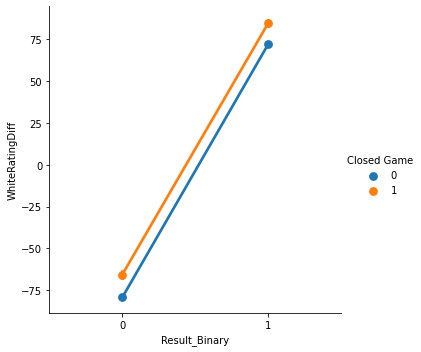

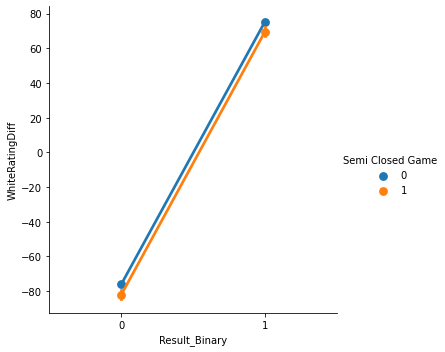

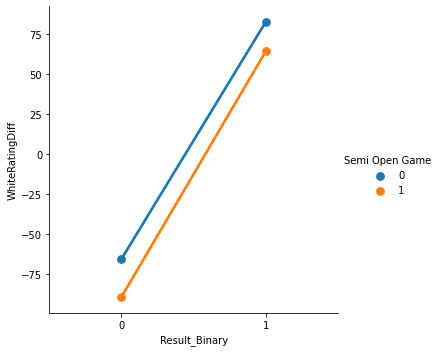

In [157]:
seaborn.catplot(x = 'Result_Binary', y = 'WhiteRatingDiff', hue = 'Closed Game', kind = 'point', \
                  data = chess_games_cleaned, logistics = True)

seaborn.catplot(x = 'Result_Binary', y = 'WhiteRatingDiff', hue = 'Semi Closed Game', kind = 'point', \
                  data = chess_games_cleaned, logistics = True)

seaborn.catplot(x = 'Result_Binary', y = 'WhiteRatingDiff', hue = 'Semi Open Game', kind = 'point', \
                  data = chess_games_cleaned, logistics = True)

Looking at the three interaction plots, it seems that Elo Rating Differential and each of the opening types played have no interaction since the lines are all parallel and do not cross. Thus, further analysis of adding interaction variables are not necessary.

# Data Limitations

There are a couple of obvious limitations to our raw and analysis-ready dataset. The first limitation comes from the source of our data. Specifically, because this is data collected for all games played on the Lichess platform during July 2016, it cannot be said to be representative of all games played on Lichess, or even all games played on chess platforms on the internet. More specifically, there are other massively popular online chess websites (chess.com or chess24.com, etc.) which also have millions of games played every month.

This is further amplified by the fact that a large number of chess games aren’t played online, and no data exists for them. Some data exists for in-person chess games, but these are usually limited to tournaments, and don’t usually account for amateur players or other over-the-board games.

Another limitation of our data relates to our Termination values. There were four unique values here, ‘Abandoned’, ‘Time forfeit’, ‘Normal’, and ‘Rules Infraction’. Rules Infraction was used to denote games where one player was found to be cheating, based on if they were playing suspiciously above a human level. One limitation of this data is that players could have cheated on games but not been caught by the Lichess platform. This is a relatively common occurrence, and can add noise to data on game results.
